In [79]:
import torch
from torch import nn
from torch import nn


In [80]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [81]:
#device = 'mps'

In [82]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If image folde doesn't  exist download it and prepare it

if image_path.is_dir():
    print (f"{image_path} directory already exist, skipping download")
else:
    print(f'{image_path} doesnt exist, creating one' )
    image_path.mkdir(parents=True, exist_ok=True)

#Making file and filling it with download content
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #Creating file pizza_steak_sushi || wb - write permission
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print ("Downloading")
    f.write(requests.content) #Writes dowloaded ti a file in with open string

 
#Unzip pizza steak sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)





data\pizza_steak_sushi directory already exist, skipping download
Downloading
Unzipping


In [83]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [84]:
#Becoming one with data

import os 

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
        
        

In [85]:
walk_through_dir(image_path)

There are 2 directories and 0 files in data\pizza_steak_sushi
There are 3 directories and 0 files in data\pizza_steak_sushi\test
There are 0 directories and 25 files in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 files in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 files in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 files in data\pizza_steak_sushi\train
There are 0 directories and 78 files in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 files in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 files in data\pizza_steak_sushi\train\sushi


In [86]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [87]:
#Visualize the images
import random
from PIL import Image



# Get all images paths
# Pick a random image using random.choice()
# Get image class name using pathlib.Path.parent.stem
# Open image using PIL
# Show image metadata
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list


[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

In [88]:
random_image_path = random.choice(image_path_list)
random_image_path
    

WindowsPath('data/pizza_steak_sushi/train/sushi/929471.jpg')

In [89]:
image_class = random_image_path.parent.stem
image_class

'sushi'

In [90]:
img = Image.open(random_image_path)

random image path: data\pizza_steak_sushi\train\sushi\929471.jpg
random_image class: sushi
image height: 512
image width: 511


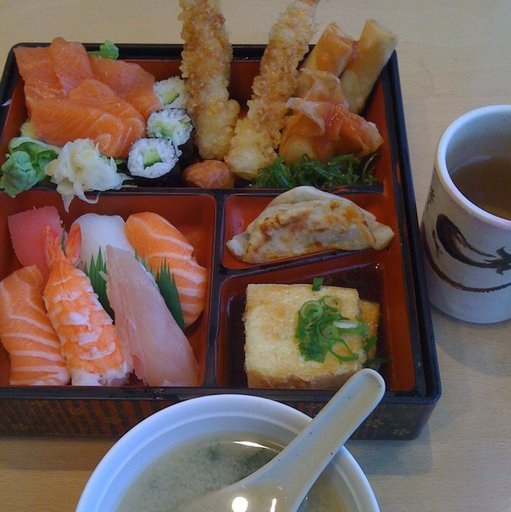

In [91]:
print(f'random image path: {random_image_path}')
print(f'random_image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 510.5, 511.5, -0.5)

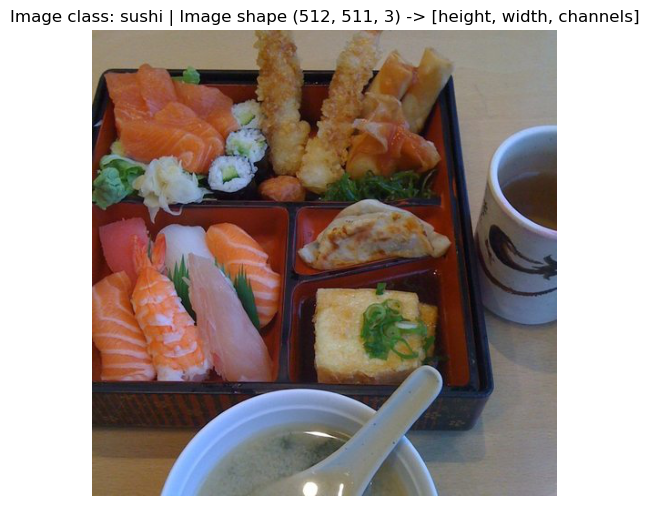

In [92]:
import numpy as np
import matplotlib.pyplot as plt
# Show image with matplotlib
image_as_array = np.asarray(img)

plt.figure(figsize=(6,8))
plt.imshow(image_as_array)
plt.title(f'Image class: {image_class} | Image shape {image_as_array.shape} -> [height, width, channels]')
plt.axis(False)

Turning images into Torch tensors format


turn images into torch.utils.data.Dataset and subsequently to torch.utils.data.DataLoader we'll call it Dataset and DataLoader



In [93]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Transforming data with torchvision.transforms

In [94]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [95]:
data_transform(img=img).shape

torch.Size([3, 64, 64])

In [96]:
data_transform(img)

tensor([[[0.5765, 0.5765, 0.5725,  ..., 0.6000, 0.6000, 0.5922],
         [0.5804, 0.5804, 0.5804,  ..., 0.6039, 0.6000, 0.5961],
         [0.5765, 0.5804, 0.5843,  ..., 0.6039, 0.6000, 0.6078],
         ...,
         [0.5529, 0.5451, 0.5412,  ..., 0.5176, 0.5176, 0.5176],
         [0.5608, 0.5490, 0.5451,  ..., 0.5176, 0.5137, 0.5176],
         [0.5686, 0.5608, 0.5490,  ..., 0.5098, 0.5098, 0.5137]],

        [[0.5961, 0.5882, 0.5804,  ..., 0.5490, 0.5412, 0.5412],
         [0.5961, 0.5922, 0.5882,  ..., 0.5529, 0.5490, 0.5490],
         [0.6000, 0.6000, 0.5882,  ..., 0.5490, 0.5529, 0.5490],
         ...,
         [0.5373, 0.5333, 0.5294,  ..., 0.4118, 0.4157, 0.4196],
         [0.5608, 0.5451, 0.5333,  ..., 0.4118, 0.4118, 0.4157],
         [0.5686, 0.5529, 0.5373,  ..., 0.4078, 0.4078, 0.4118]],

        [[0.6000, 0.5725, 0.5490,  ..., 0.4784, 0.4706, 0.4353],
         [0.5961, 0.5843, 0.5647,  ..., 0.4784, 0.4706, 0.4627],
         [0.5961, 0.5882, 0.5686,  ..., 0.4627, 0.4627, 0.

Visualising transfored image

In [97]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].axis(False)
            ax[0].set_title(f'Original\nSize: {f.size}')

            #Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) #changing shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)



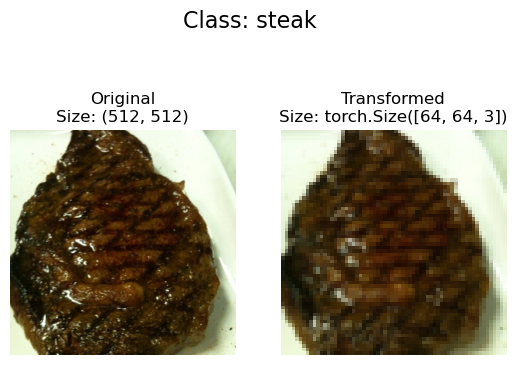

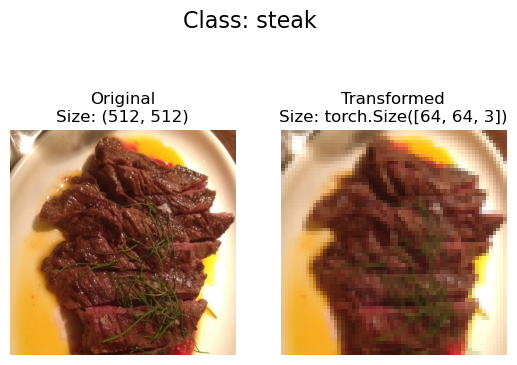

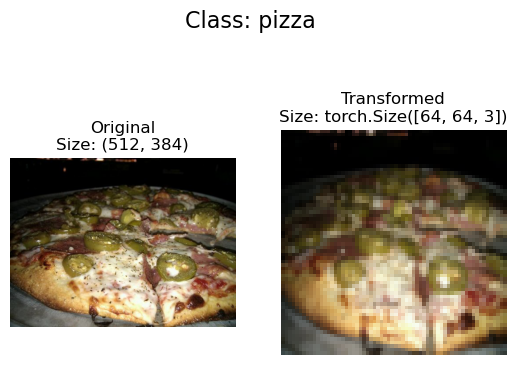

In [98]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform,
                        n=3, seed=46)

Loding images data using ImageFolder

In [99]:
from torchvision import datasets

In [100]:
# Use ImageFolder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for data
                                  target_transform=None)  #transform for target


test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform) #transform for data
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [101]:
# Getting class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [102]:
#Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [103]:
len(train_data), len(test_data)

(225, 75)

In [104]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [105]:
# Index on tran_data Dataset ti get single image and label
img, label = train_data[0][0], train_data[0][1]
print (f'Image tenor:\n {img}')
print (f'image shape {img.shape}')
print (f'Image datatype {img.dtype}')
print (f'Image label {label}')
print (f'Label datatype {type(label)}')



Image tenor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

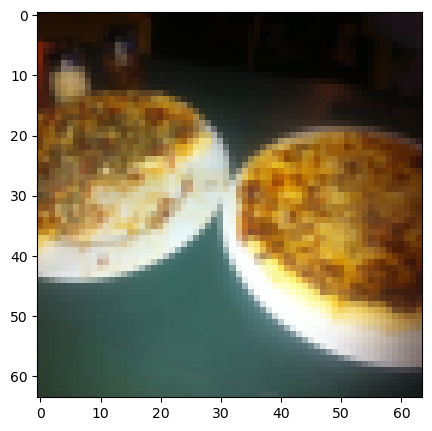

In [106]:
#Changing colorchannels  to see image in matplotlib

permuted_image = img.permute(1,2,0)

plt.figure(figsize=(5,5))
plt.imshow(permuted_image)


Making a DataLoader from Dataset. It makes images iterable and set a batchsize

In [107]:
# Turn train and test datasets into Dataloader

In [108]:
import os
os.cpu_count()

16

In [109]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=False)  

In [110]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x2038adadd90>,
 <torch.utils.data.dataloader.DataLoader at 0x2038de371d0>)

In [111]:
len(train_data_loader), len(test_data_loader)

(225, 75)

In [112]:
img, label = next(iter(train_data_loader))
print (f'Image shape: {img.shape} -> batch_size, color_channels, height, width')
print (f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) -> batch_size, color_channels, height, width
Label shape: torch.Size([1])


MAKING DATASEST WITHOUT IMAGE_Folder CLASS and UseIt with DataLoader

Replicating Image_folder Class

In [113]:
# Want to load images from file
# Want to be able to get class names from Dataset
# Want to be able to get classes as dictionary from the Dataset
 

HAVENT DONE ONLY WATCHED IF YOU NEED WATCH IT

----------------------------------------------------------
Data Augmentation
----------------------------------------------------------


In [114]:
from torchvision import transforms

In [115]:
train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()])

In [116]:
#GEt all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:5]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg')]

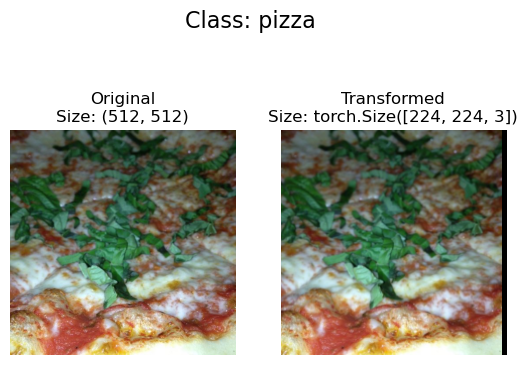

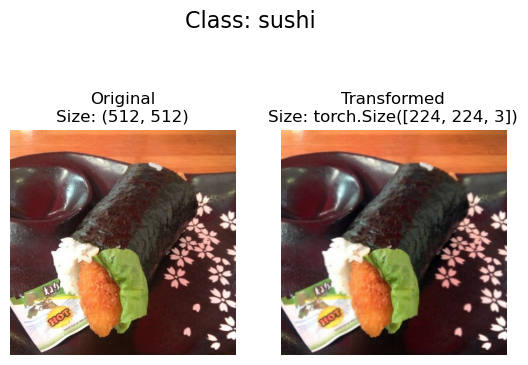

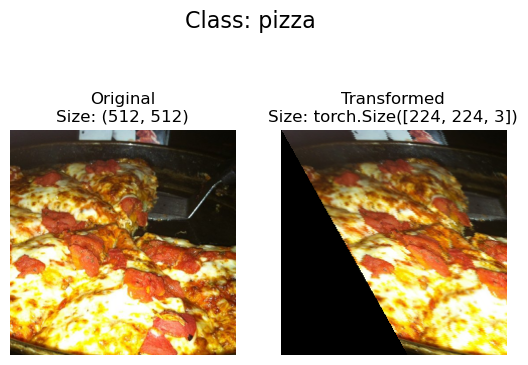

In [117]:
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed=None)

Model 0: Making test with TINY VGG without data augmentation from CNN Explainew Web Site

In [118]:
#Creating transforms and loading data for model_0

simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [119]:
#Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# Turan the dataset into DataLoaders
import os
from torch.utils.data import DataLoader

#Setup batch size and number of works
BATCH_SIZE = 32
#NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 2

#Create DataLoader

train_data_loader_simple = DataLoader(dataset=train_data_simple,
                               batch_size=BATCH_SIZE,
                               shuffle=True,
                               num_workers=NUM_WORKERS
                               )

test_data_loader_simple = DataLoader(dataset=test_data_simple,
                               batch_size=BATCH_SIZE,
                               shuffle=False,
                               num_workers=NUM_WORKERS
                               )

In [120]:
#MAking TinyVgg model Class
from torch import nn

class TinyVGG(nn.Module):
    '''Model architecture from CNN Explainer'''

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int)-> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Dropout(0.2),    
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #For MaxPool default stride is same as kernel_size
            

        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #For MaxPool default stride is same as kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, #Got 13*13 from first lainch error RuntimeError: linear(): input and weight.T shapes cannot be multiplied (32x1690 and 10x3)
                      out_features=output_shape)
                      
            )




    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
    #   Alternative and faster (FUSION operator)return self.classifier(self.conv_block_2(self.conv_block_1(x)))




         
         


In [121]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0 

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [122]:
### Try a forward pass of single image to test a model and to know output features

image_batch, label_batch = next(iter(train_data_loader_simple))
image_batch.shape, label_batch.shape
                                

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [123]:
#Try forward path
model_0(image_batch.to(device))

tensor([[ 0.0322,  0.0084,  0.0042],
        [ 0.0230,  0.0069,  0.0209],
        [ 0.0191,  0.0320,  0.0204],
        [ 0.0110, -0.0036,  0.0196],
        [ 0.0051,  0.0229,  0.0145],
        [ 0.0094,  0.0074,  0.0235],
        [ 0.0277,  0.0147,  0.0175],
        [ 0.0301, -0.0043,  0.0114],
        [ 0.0394, -0.0309,  0.0152],
        [ 0.0038, -0.0144,  0.0241],
        [ 0.0054,  0.0112,  0.0240],
        [ 0.0263, -0.0108,  0.0023],
        [ 0.0173, -0.0099,  0.0121],
        [ 0.0137, -0.0148,  0.0198],
        [ 0.0043, -0.0228,  0.0146],
        [ 0.0155, -0.0117,  0.0216],
        [ 0.0118, -0.0177,  0.0178],
        [ 0.0237, -0.0153,  0.0100],
        [ 0.0186,  0.0154,  0.0126],
        [ 0.0115,  0.0170,  0.0037],
        [ 0.0281,  0.0144,  0.0025],
        [-0.0026, -0.0057,  0.0203],
        [ 0.0097,  0.0013, -0.0066],
        [ 0.0089, -0.0044,  0.0154],
        [ 0.0088, -0.0079,  0.0144],
        [ 0.0145,  0.0127,  0.0120],
        [ 0.0090, -0.0010,  0.0016],
 

Using torchinfo for checking shapes

In [124]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Dropout: 2-3                      [1, 10, 62, 62]           --
│    └─Conv2d: 2-4                       [1, 10, 60, 60]           910
│    └─ReLU: 2-5                         [1, 10, 60, 60]           --
│    └─Dropout: 2-6                      [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-7                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-8                       [1, 10, 28, 28]           910
│    └─ReLU: 2-9                         [1, 10, 28, 28]           --
│    └─Dropout: 2-10                     [1, 10, 28, 28]           --
│    └─Conv2

Creating trainig and test loops fo ANY model and dataloader

In [125]:
# train_step() takes a model  and dataloader and trains the model on the dataloader
# test_step() takes a model  and dataloader and evaluates the model on the dataloader

In [126]:
#import torch.utils.data.dataloader

In [127]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        #y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        #train_acc += (y_pred_class == y).sum().item()/len(y_pred)

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

        #Averiging metrics to average fo the epoch

    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)

    return train_loss, train_acc






In [128]:
#Create a test step 
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    
    model.eval()

    test_loss, test_acc = 0, 0      

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc



In [129]:
# Making training functions
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 20,
          device=device):
    
    #Create dict for results
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        print(f"Epoch: {epoch} | Train_loss: {train_loss:.4f}, Train_acc: {train_acc:.4f}, Test_loss: {test_loss:.4f}, Test_acc: {test_acc:.4f}")
        

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results
          

In [130]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 50

model_0 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader_simple,
                        test_dataloader=test_data_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1090, Train_acc: 0.3008, Test_loss: 1.0993, Test_acc: 0.1979
Epoch: 1 | Train_loss: 1.0991, Train_acc: 0.2734, Test_loss: 1.1004, Test_acc: 0.2386
Epoch: 2 | Train_loss: 1.0917, Train_acc: 0.3203, Test_loss: 1.0806, Test_acc: 0.4934
Epoch: 3 | Train_loss: 1.1176, Train_acc: 0.4023, Test_loss: 1.0886, Test_acc: 0.3532
Epoch: 4 | Train_loss: 1.0054, Train_acc: 0.4727, Test_loss: 1.1111, Test_acc: 0.2188
Epoch: 5 | Train_loss: 0.9362, Train_acc: 0.5312, Test_loss: 1.0658, Test_acc: 0.4252
Epoch: 6 | Train_loss: 0.8082, Train_acc: 0.6289, Test_loss: 1.1418, Test_acc: 0.3636
Epoch: 7 | Train_loss: 0.9075, Train_acc: 0.5898, Test_loss: 0.9858, Test_acc: 0.5237
Epoch: 8 | Train_loss: 0.7976, Train_acc: 0.6445, Test_loss: 1.0471, Test_acc: 0.3324
Epoch: 9 | Train_loss: 1.0391, Train_acc: 0.5000, Test_loss: 1.0824, Test_acc: 0.3314
Epoch: 10 | Train_loss: 0.8564, Train_acc: 0.5742, Test_loss: 0.9795, Test_acc: 0.4924
Epoch: 11 | Train_loss: 0.8532, Train_acc: 0.5625, Te

In [131]:
model_0_results

{'train_loss': [1.1090035289525986,
  1.0991252958774567,
  1.0917128324508667,
  1.117608480155468,
  1.005396343767643,
  0.9362085089087486,
  0.8082109000533819,
  0.9074551798403263,
  0.7976183742284775,
  1.0391442626714706,
  0.8563747406005859,
  0.8532352894544601,
  0.7569793052971363,
  0.843651793897152,
  1.039441928267479,
  0.8135716021060944,
  0.8234640881419182,
  0.8619195073843002,
  0.7459394484758377,
  0.6491250267717987,
  0.6351192891597748,
  0.6345799788832664,
  0.6611759886145592,
  0.7821713462471962,
  0.7151737883687019,
  0.7136740460991859,
  0.5613224478438497,
  0.5671354830265045,
  0.5670873448252678,
  0.4983795937150717,
  0.5086332149803638,
  0.42856365628540516,
  0.4630207158625126,
  0.4342803284525871,
  0.625229001045227,
  0.7844717018306255,
  0.47210607305169106,
  0.6265346854925156,
  0.7938991151750088,
  0.5251386426389217,
  0.6192515045404434,
  0.4688658583909273,
  0.37532681762240827,
  0.6909939721226692,
  0.4007413792423904

In [132]:
#Plotting a loss curve of model_0


In [133]:
def plot_loss_curves(results: dict[str, list[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, test_accuracy, label='Test accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
     






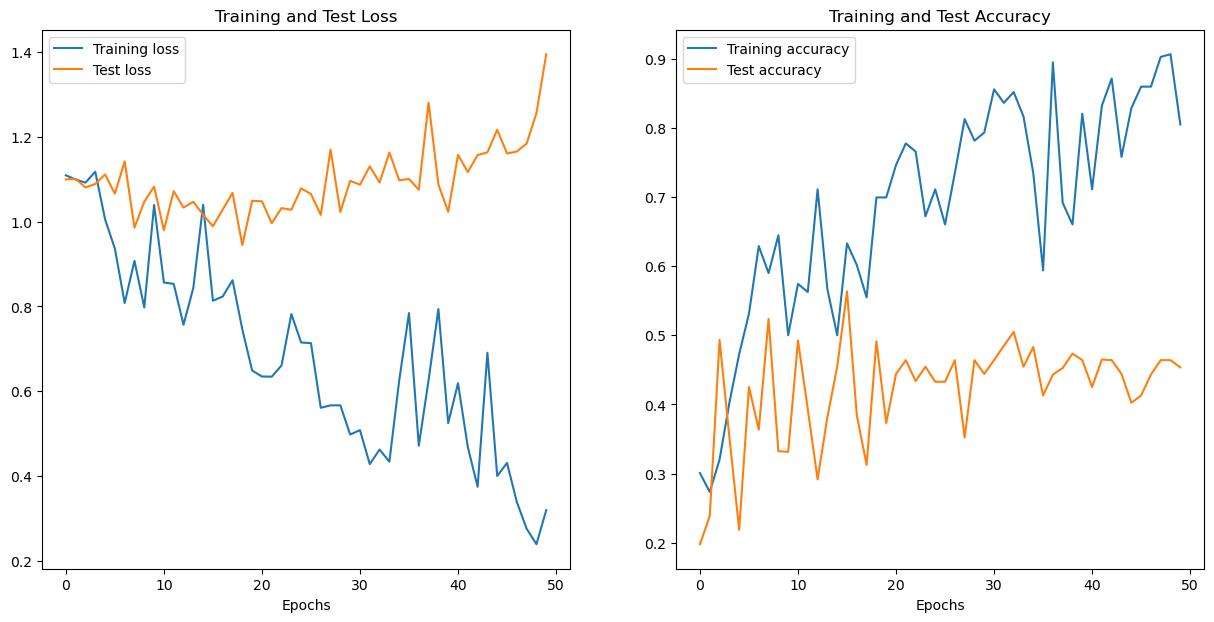

In [134]:
plot_loss_curves(model_0_results)

In [170]:
# Timny VGG with data augmentation

train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.TrivialAugmentWide(num_magnitude_bins=31),
transforms.ToTensor()
])

test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.ToTensor()
])

In [171]:
#Create train and test datasets using data augmentation
train_data_augumented = datasets.ImageFolder(root=train_dir, 
            transform=train_transform_trivial)
test_data = datasets.ImageFolder(root=test_dir, 
            transform=test_transform_simple) 
 


In [172]:
len(train_data_augumented), len(train_data_simple)

(225, 225)

In [178]:
train_dataloader_augumented = DataLoader(dataset=train_data_augumented,
batch_size=8,
shuffle=True,
num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data,
batch_size=8,
shuffle=False,
num_workers=NUM_WORKERS)

In [179]:
len(train_dataloader_augumented), len(train_data_loader_simple)

(29, 8)

In [180]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.0001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augumented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1008, Train_acc: 0.3534, Test_loss: 1.1025, Test_acc: 0.2375
Epoch: 1 | Train_loss: 1.1008, Train_acc: 0.3233, Test_loss: 1.1046, Test_acc: 0.2375
Epoch: 2 | Train_loss: 1.0984, Train_acc: 0.3276, Test_loss: 1.1006, Test_acc: 0.2375
Epoch: 3 | Train_loss: 1.0990, Train_acc: 0.3319, Test_loss: 1.1018, Test_acc: 0.3625
Epoch: 4 | Train_loss: 1.0930, Train_acc: 0.4009, Test_loss: 1.1057, Test_acc: 0.2375
Epoch: 5 | Train_loss: 1.0963, Train_acc: 0.3405, Test_loss: 1.1049, Test_acc: 0.2625
Epoch: 6 | Train_loss: 1.0832, Train_acc: 0.4483, Test_loss: 1.1041, Test_acc: 0.2625
Epoch: 7 | Train_loss: 1.0730, Train_acc: 0.3578, Test_loss: 1.0951, Test_acc: 0.3375
Epoch: 8 | Train_loss: 1.0547, Train_acc: 0.4526, Test_loss: 1.0952, Test_acc: 0.3500
Epoch: 9 | Train_loss: 1.0596, Train_acc: 0.4397, Test_loss: 1.0921, Test_acc: 0.3250
Epoch: 10 | Train_loss: 1.0310, Train_acc: 0.5086, Test_loss: 1.0668, Test_acc: 0.4333
Epoch: 11 | Train_loss: 1.0184, Train_acc: 0.4655, Te

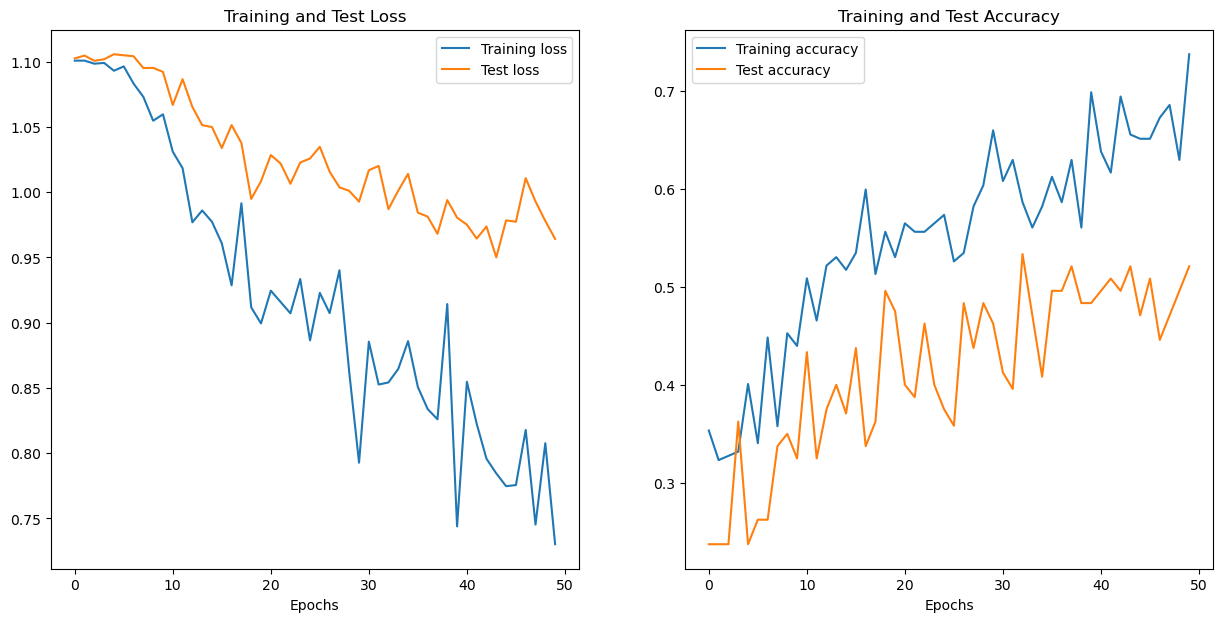

In [181]:
plot_loss_curves(model_1_results)

Making my own dataset with augmentatin

In [142]:
my_train_transform_1  = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.TrivialAugmentWide(num_magnitude_bins=31),
transforms.ToTensor()
])

my_test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.ToTensor()
])

In [143]:
#Create train and test datasets using data augmentation
my_train_data_augumented_1 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_1)
my_train_data_augumented_2 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_1)
my_train_data_augumented_3 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_1)


my_test_data = datasets.ImageFolder(root=test_dir, 
            transform=test_transform_simple) 

In [144]:
#Combinig dataset

from torch.utils.data import ConcatDataset
my_train_combined_dataset_1 = ConcatDataset([my_train_data_augumented_1, my_train_data_augumented_2,
my_train_data_augumented_3])

In [145]:
#Comparing datasets
len(my_train_combined_dataset_1), len(train_data_augumented), len(train_data_simple)

(675, 225, 225)

In [146]:
my_train_dataloader_augumented_1 = DataLoader(dataset=my_train_combined_dataset_1,
batch_size=BATCH_SIZE,
shuffle=True,
num_workers=NUM_WORKERS)

my_test_dataloader_simple = DataLoader(dataset=my_test_data,
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=NUM_WORKERS)

In [147]:
#Comparing dataloaders
len(my_train_dataloader_augumented_1), len(train_dataloader_augumented), len(train_data_loader_simple)

(22, 8, 8)

In [148]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



my_model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=my_model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

my_model_1_results = train(model=my_model_1,
                        train_dataloader=my_train_dataloader_augumented_1,
                        test_dataloader=my_test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.0996, Train_acc: 0.3262, Test_loss: 1.1122, Test_acc: 0.2812
Epoch: 1 | Train_loss: 1.0731, Train_acc: 0.4186, Test_loss: 1.0778, Test_acc: 0.3419
Epoch: 2 | Train_loss: 0.9843, Train_acc: 0.5369, Test_loss: 1.0591, Test_acc: 0.3419
Epoch: 3 | Train_loss: 0.9774, Train_acc: 0.5000, Test_loss: 1.0277, Test_acc: 0.4223
Epoch: 4 | Train_loss: 0.9783, Train_acc: 0.4967, Test_loss: 1.0510, Test_acc: 0.3731
Epoch: 5 | Train_loss: 0.8758, Train_acc: 0.5895, Test_loss: 1.0480, Test_acc: 0.4347
Epoch: 6 | Train_loss: 0.8708, Train_acc: 0.6269, Test_loss: 1.0190, Test_acc: 0.4441
Epoch: 7 | Train_loss: 0.8322, Train_acc: 0.6160, Test_loss: 0.9648, Test_acc: 0.5161
Epoch: 8 | Train_loss: 0.8663, Train_acc: 0.6009, Test_loss: 0.9951, Test_acc: 0.5057
Epoch: 9 | Train_loss: 0.8360, Train_acc: 0.6373, Test_loss: 1.0084, Test_acc: 0.4337
Epoch: 10 | Train_loss: 0.7736, Train_acc: 0.6619, Test_loss: 1.0531, Test_acc: 0.4025
Epoch: 11 | Train_loss: 0.7473, Train_acc: 0.6946, Te

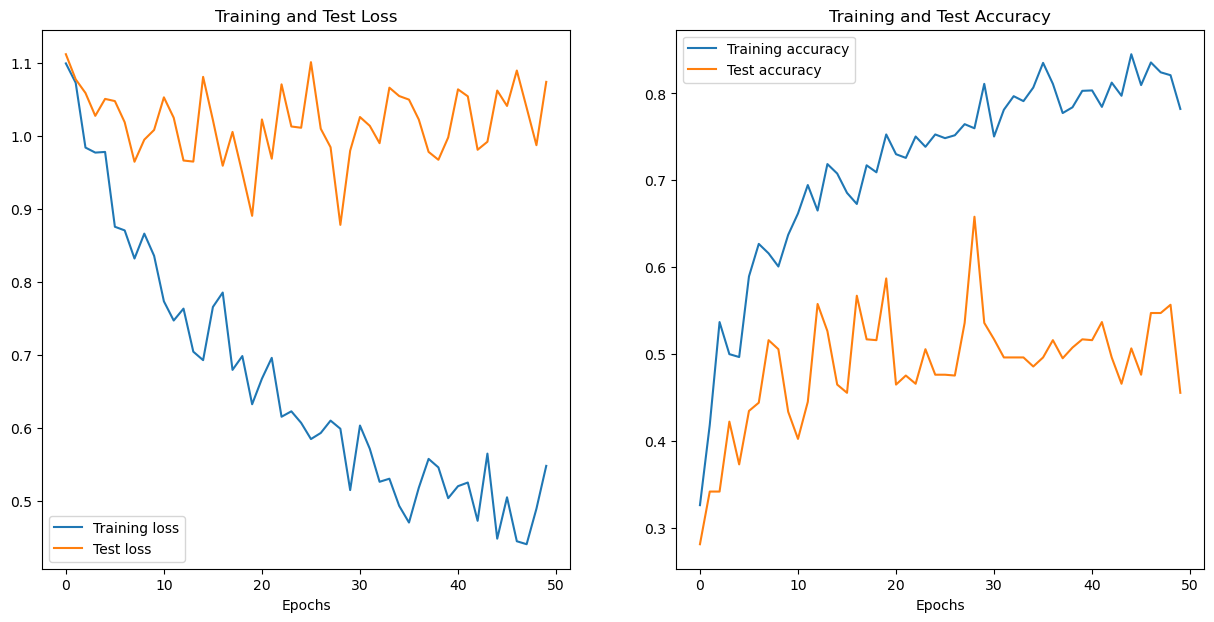

In [149]:
plot_loss_curves(my_model_1_results)

Making my own dataset with ANOTHER augmentatin

In [150]:
my_train_transform_2  = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.RandomHorizontalFlip(p=0.6),
transforms.RandomAdjustSharpness(sharpness_factor=2),
transforms.ToTensor()
])

my_test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.ToTensor()
])

In [151]:
#Create train and test datasets using data augmentation
my_train_data_augumented_1 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_2)
my_train_data_augumented_2 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_2)
my_train_data_augumented_3 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_2)


my_test_data = datasets.ImageFolder(root=test_dir, 
            transform=test_transform_simple) 

In [152]:
#Combinig dataset

from torch.utils.data import ConcatDataset
my_train_combined_dataset_2 = ConcatDataset([my_train_data_augumented_1, my_train_data_augumented_2,
my_train_data_augumented_3])

In [153]:
my_train_dataloader_augumented_2 = DataLoader(dataset=my_train_combined_dataset_2,
batch_size=BATCH_SIZE,
shuffle=True,
num_workers=NUM_WORKERS)

my_test_dataloader_simple = DataLoader(dataset=my_test_data,
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=NUM_WORKERS)

In [154]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



my_model_2 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=my_model_2.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

my_model_2_results = train(model=my_model_2,
                        train_dataloader=my_train_dataloader_augumented_2,
                        test_dataloader=my_test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.0973, Train_acc: 0.3277, Test_loss: 1.1052, Test_acc: 0.3021
Epoch: 1 | Train_loss: 1.0393, Train_acc: 0.4834, Test_loss: 1.1008, Test_acc: 0.3011
Epoch: 2 | Train_loss: 0.9387, Train_acc: 0.5445, Test_loss: 1.0298, Test_acc: 0.3419
Epoch: 3 | Train_loss: 0.8764, Train_acc: 0.5625, Test_loss: 1.0001, Test_acc: 0.4119
Epoch: 4 | Train_loss: 0.8759, Train_acc: 0.5786, Test_loss: 1.0382, Test_acc: 0.3523
Epoch: 5 | Train_loss: 0.7485, Train_acc: 0.6818, Test_loss: 0.9969, Test_acc: 0.4129
Epoch: 6 | Train_loss: 0.7269, Train_acc: 0.6828, Test_loss: 1.0176, Test_acc: 0.4536
Epoch: 7 | Train_loss: 0.6865, Train_acc: 0.7045, Test_loss: 0.9927, Test_acc: 0.4337
Epoch: 8 | Train_loss: 0.6276, Train_acc: 0.7325, Test_loss: 0.9289, Test_acc: 0.5985
Epoch: 9 | Train_loss: 0.6010, Train_acc: 0.7571, Test_loss: 0.9504, Test_acc: 0.5871
Epoch: 10 | Train_loss: 0.4919, Train_acc: 0.8040, Test_loss: 0.9962, Test_acc: 0.5777
Epoch: 11 | Train_loss: 0.4230, Train_acc: 0.8395, Te

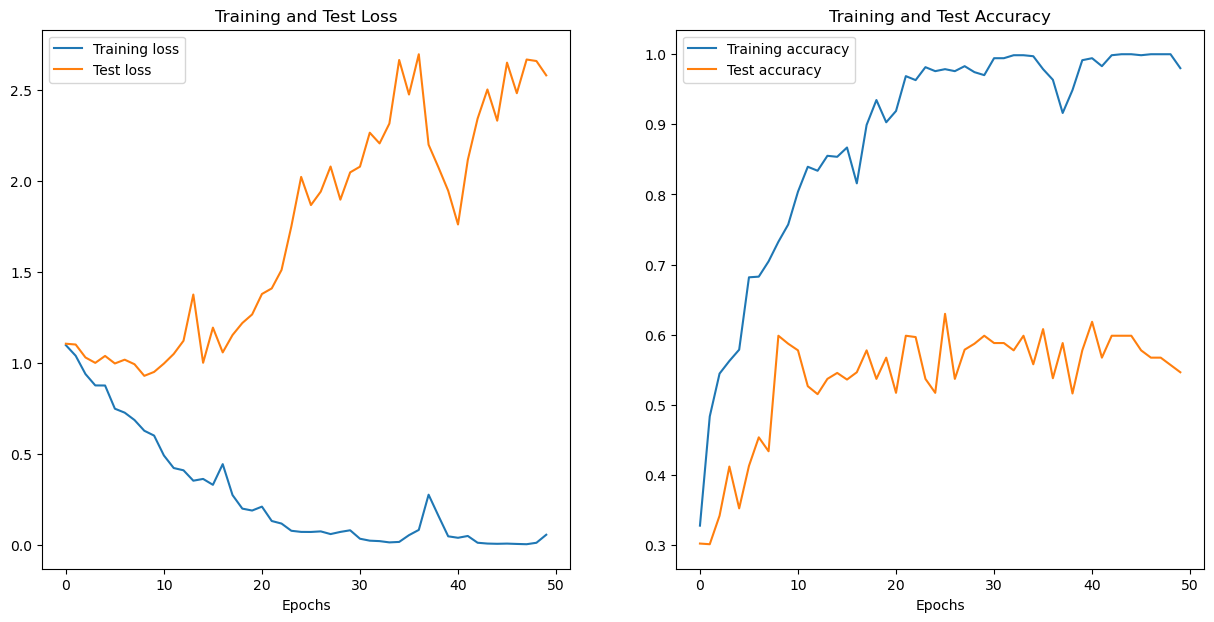

In [155]:
plot_loss_curves(my_model_2_results)

Compare model results

In [183]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
my_model_1_df = pd.DataFrame(my_model_1_results)
my_model_2_df = pd.DataFrame(my_model_2_results)

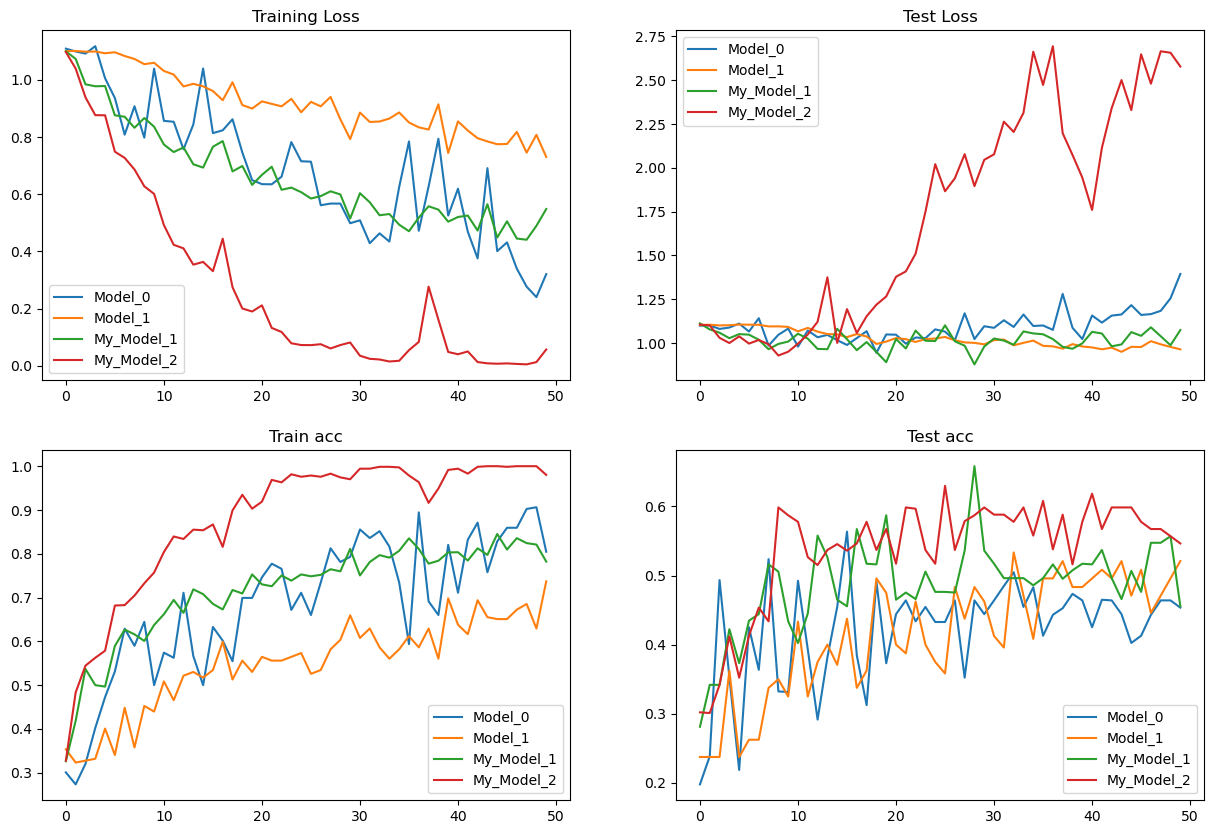

In [192]:
#making a plot

plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label="Model_0")
plt.plot(epochs, model_1_df['train_loss'], label='Model_1')
plt.plot(epochs, my_model_1_df['train_loss'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['train_loss'], label='My_Model_2')
plt.title('Training Loss')
plt.legend()


plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label="Model_0")
plt.plot(epochs, model_1_df['test_loss'], label='Model_1')
plt.plot(epochs, my_model_1_df['test_loss'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['test_loss'], label='My_Model_2')
plt.title('Test Loss')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label="Model_0")
plt.plot(epochs, model_1_df['train_acc'], label='Model_1')
plt.plot(epochs, my_model_1_df['train_acc'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['train_acc'], label='My_Model_2')
plt.title('Train acc')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label="Model_0")
plt.plot(epochs, model_1_df['test_acc'], label='Model_1')
plt.plot(epochs, my_model_1_df['test_acc'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['test_acc'], label='My_Model_2')
plt.title('Test acc')
plt.legend()
